In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

from spine.models import train, models
from spine.data import utils, datasets
from spine.visualization import visualize

/usr/local/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
processed_dir = '../data/processed/'
input_size = 3 * 7
output_size = 3 * 4
batch_size = 32
epochs = 20

### Baseline model training

In [5]:
skeleton_dataset = datasets.StaticSkeletonDataset(processed_dir)

train_set, val_set, test_set = utils.split_dataset(skeleton_dataset, train_ratio=0.7, val_ratio=0.2)
train_dataloader = DataLoader(train_set, batch_size=batch_size)
val_dataloader = DataLoader(val_set, batch_size=batch_size)
test_dataloader = DataLoader(test_set, batch_size=batch_size)


model = models.BaselineModel(input_size, output_size)
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
trainer = train.Trainer(model, loss_function, optimizer, device='cpu', metric_fn=nn.L1Loss())

In [6]:
train_val_losses = trainer.train_model(train_dataloader, val_dataloader, epochs=epochs)
test_losses = trainer.test_model(test_dataloader)

Epoch 20/20 - Train loss: 0.1573, Val loss: 0.1564: 100%|██████████| 20/20 [00:00<00:00, 69.94it/s]

Test Loss: 0.1522
Test Metric: 0.3108


### Losses and metric curves

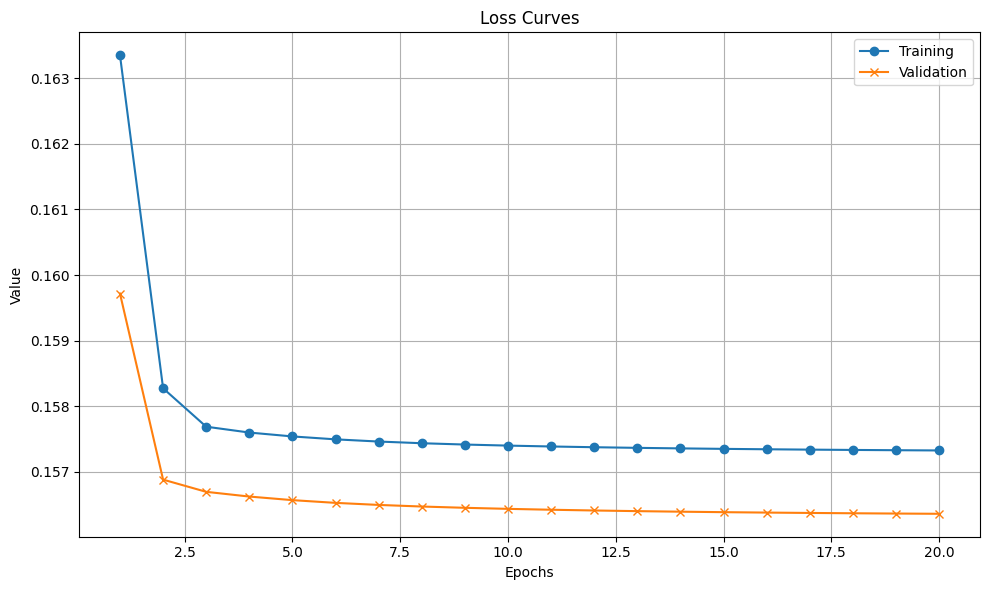

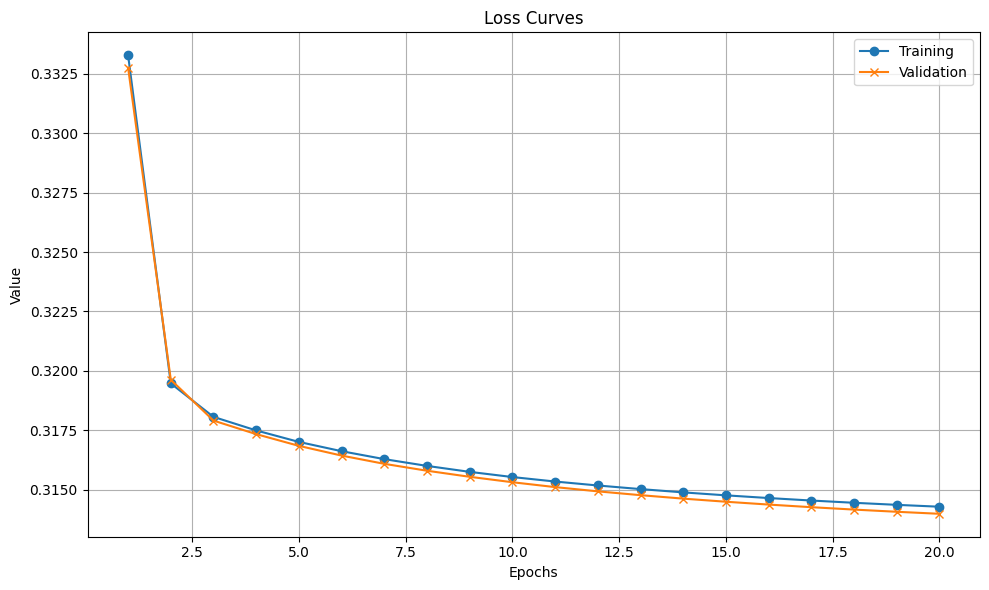

In [7]:
visualize.plot_curves(train_val_losses['train_losses'], train_val_losses['val_losses'])
visualize.plot_curves(train_val_losses['train_metric'], train_val_losses['val_metric'])